# Q.1 Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required.

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


# Q2.Build a CNN architecture with Keras and stack an ANN on top of CNN.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert the data to float32 and normalize it
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Define the ANN architecture
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/20
391/391 [==============================] - 6s 10ms/step - loss: 1.6734 - accuracy: 0.3763 - val_loss: 1.2635 - val_accuracy: 0.5373
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.2088 - accuracy: 0.5667 - val_loss: 1.0270 - val_accuracy: 0.6398
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0146 - accuracy: 0.6445 - val_loss: 0.9103 - val_accuracy: 0.6814
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8947 - accuracy: 0.6897 - val_loss: 0.8189 - val_accuracy: 0.7142
Epoch 5/20
391/391 [==============================] - 3s 9ms/step - loss: 0.8002 - accuracy: 0.7252 - val_loss: 0.8009 - val_accuracy: 0.7228
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7184 - accuracy: 0.7514 - val_loss: 0.7949 - val_accuracy: 0.7261
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.6648 - accuracy: 0.7700 - val_loss: 0.7530 - val_accuracy: 0.7426
Epoch

# Q.3 Fit and evaluate the model. Plot the training and validation curves.

In [ ]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9473 - accuracy: 0.7588


In [ ]:
results

[0.9472613334655762, 0.7588000297546387]

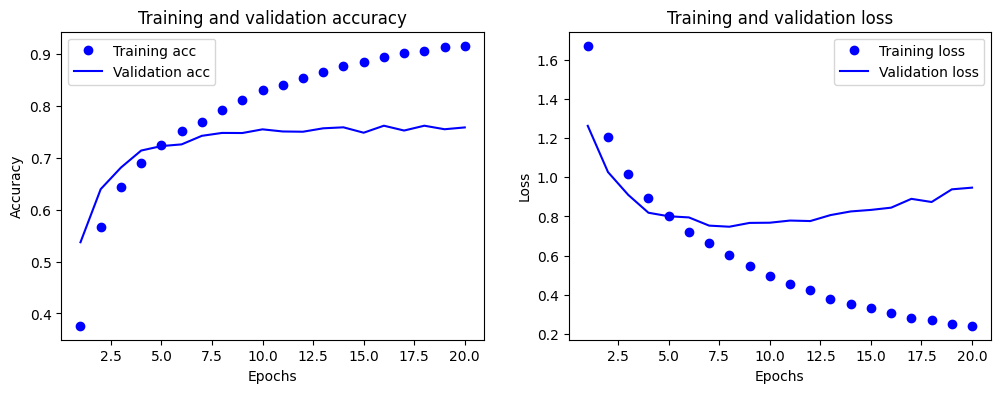

In [ ]:
import matplotlib.pyplot as plt



# Plot the training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
